# EIT Continous Model - Quick Start

In [1]:
from module1_mesh import*
from module2_forward import*
from module3_inverse import*
from module4_auxiliar import*
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


## Defining mesh

In [2]:
mesh_inverse, mesh_direct=MyMesh(r=1, n=8, n_vertex=121) #Genereting mesh
mesh_direct=refine(mesh_direct)                          #Refine again mesh

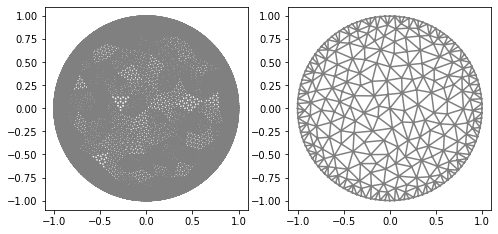

In [3]:
"Plot"
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_direct);
plt.subplot(1,2,2)
plot(mesh_inverse);

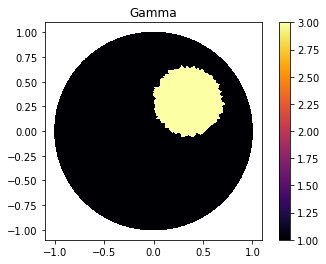

In [4]:
"Defining gamma"
ValuesCells0=GammaCircle(mesh_direct,3,1,0.35, 0.35, 0.30); #mesh, value_int, value_ex, radius, certerx, certery.
gamma0=CellFunction(mesh_direct, values=ValuesCells0); #Array to CellFunction

"Plot"
V_DG=FiniteElement('DG',mesh_inverse.ufl_cell(),0) #Descontinous Galerkin degree 0
gamma_direct=plot_figure(mesh_direct, V_DG, gamma0, name="Gamma"); #Just plot my gamma0

In [5]:
"Current"
n_g=6  #Number measurements 
I_all=current_method(n_g, value=1, method=1) #Function that returns the current

In [6]:
"ForwardProblem"
VD=FiniteElement('CG',mesh_direct.ufl_cell(),1)      #Continuos Galerking degree 1
ForwardObject=ForwardProblem(mesh_direct)              #Forward Object  
list_u0=ForwardObject.solve_forward(VD, gamma0, I_all) #Solver, Space, gamma and current.

#If you will use it in the inverse problem without noise.
u0_boundary=ForwardObject.boundary_array(mesh_inverse) #Boundary data in the mesh_inverse

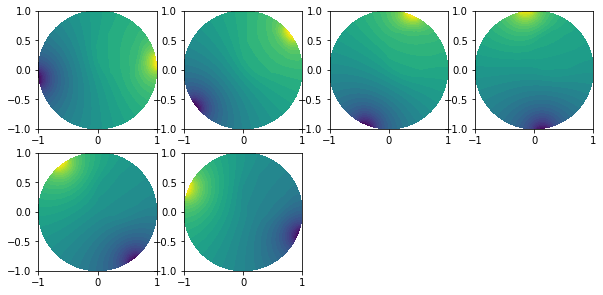

In [7]:
plt.figure(figsize=(10, 10))
for i in range(0, n_g):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])

In [8]:
#Setting noise in the data.
"Noise Parameters"
noise_level=0.005 #0.5%
noise_type='uniform' 
seed=1 #Random seed
 
u0_boundary_noised=ForwardObject.add_noise(noise_level, noise_type, seed, mesh_inverse) #Returns noised data.

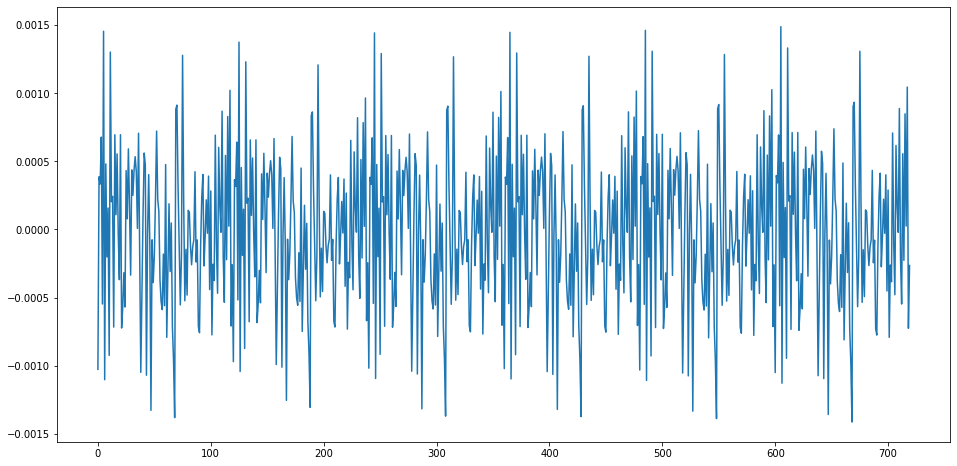

In [9]:
plt.figure(figsize=(16, 8))
size=range(0,len(u0_boundary_noised))
plt.plot(size, u0_boundary-u0_boundary_noised)

### Inverse Solver

In [12]:
"Object"
VI=FiniteElement('CG',mesh_inverse.ufl_cell(),1)                   #Creating Object
InverseObject=InverseProblem(mesh_inverse, VI, u0_boundary_noised, I_all) #Add mesh, space, data, current
InverseObject.set_NoiseParameters(tau=2, noise_level=0.005)        #Inform if data is noised
InverseObject.set_solverconfig(step_limit=30)                      #Step Limit

"Solver"
InverseObject.solve_inverse() #Solve

Residuo (%)= 13.128484723996204  passo: 0 Inner step:  0
Calculando Jacobiana.
Fim do cálculo da Jacobiana
mu_n 0.9
Residuo (%)= 12.42903341084721  passo: 1 Inner step:  1
mu_n 0.9
Residuo (%)= 11.836200205304468  passo: 2 Inner step:  1
mu_n 0.8991
Residuo (%)= 11.329641700541277  passo: 3 Inner step:  1
mu_n 0.8982009
Residuo (%)= 10.893546964977977  passo: 4 Inner step:  1
mu_n 0.8973026990999999
Residuo (%)= 10.233562856452233  passo: 5 Inner step:  2
mu_n 0.9477026982004499
Residuo (%)= 9.93921009969572  passo: 6 Inner step:  1
mu_n 0.9278198955922045
Residuo (%)= 9.680527070270651  passo: 7 Inner step:  1
mu_n 0.9176231549396461
Residuo (%)= 9.273951786450626  passo: 8 Inner step:  2
mu_n 0.9578527658923532
Residuo (%)= 9.090373543730799  passo: 9 Inner step:  1
mu_n 0.9377570148639317
Residuo (%)= 8.794722973981074  passo: 10 Inner step:  2
mu_n 0.9274510652705771
Residuo (%)= 8.550132095263876  passo: 11 Inner step:  2
mu_n 0.9265236142053065
Residuo (%)= 8.266526059793348  pas

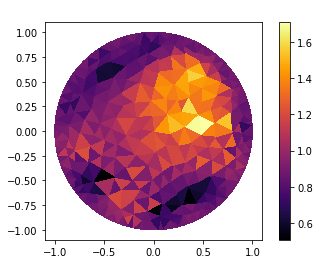

In [13]:
"Getting the result"
gamma_k=InverseObject.gamma_k

"Plot result"
V_DG=FiniteElement('DG',mesh_inverse.ufl_cell(),0)
gamma_k=plot_figure(mesh_inverse, V_DG, gamma_k, name=" ");